## Classification of Fire Types in India Using MODIS Satellite Data (2021–2023)

India witnesses various types of fire incidents annually, including forest fires, agricultural burning, volcanic activity, and other thermal anomalies. Accurate identification of fire sources is crucial for timely disaster response, environmental monitoring, and resource management. The MODIS sensors aboard NASA’s Terra and Aqua satellites provide reliable, near real-time thermal anomaly data globally, including for India.

While the MODIS dataset includes rich geospatial and thermal parameters, the challenge lies in correctly classifying the type of fire event — whether it stems from vegetation, volcanoes, static land sources, or offshore sources — using satellite-captured features.

### Objective:
To develop a machine learning classification model that can accurately predict the type of fire using MODIS fire detection data for India from 2021 to 2023

### 🔥 MODIS Dataset Summary (India: 2021–2023)
#### 📌 About MODIS:
The Moderate Resolution Imaging Spectroradiometer (MODIS) is a key NASA sensor aboard the Terra (launched 1999) and Aqua (launched 2002) satellites. It captures Earth observation data at a spatial resolution of 1 km, suitable for global fire monitoring and environmental studies.

MODIS data used in this project is sourced from NASA’s FIRMS (Fire Information for Resource Management System) and focuses on thermal anomalies and active fire detection.

## 🛰️ Satellite Characteristics:
Terra satellite (EOS AM) captures morning overpasses.

Aqua satellite (EOS PM) captures afternoon overpasses.

MODIS provides 2–4 observations per day, especially in mid-latitudes like India.

## 🔍 Fire Detection Mechanism:
*MODIS uses contextual algorithms to detect thermal anomalies.*

*It evaluates each pixel using mid-infrared channels (Bands 21/22 for  fire detection and 31 for surface temperature).*

*The pixel is marked as one of: missing, cloud, water, non-fire, fire, or unknown.*




### ⚠️ Note on Accuracy:
MODIS NRT (Near Real-Time) data may have slightly lower geolocation accuracy, particularly from Aqua satellite due to orbit estimation delays. Errors can occasionally reach several kilometers.



### ✅ Use Cases for MODIS Fire Data:
Real-time wildfire alerts

Agricultural burn detection

Forest fire management

Hotspot pattern analysis in ecological studies



### 📚 Reference Links:
🔗 NASA FIRMS Documentation

🔗 MODIS Active Fire Product Info (LP DAAC)

🔗 Understanding MODIS Fire Algorithm

### 🔬 Important Parameters in MODIS Data:

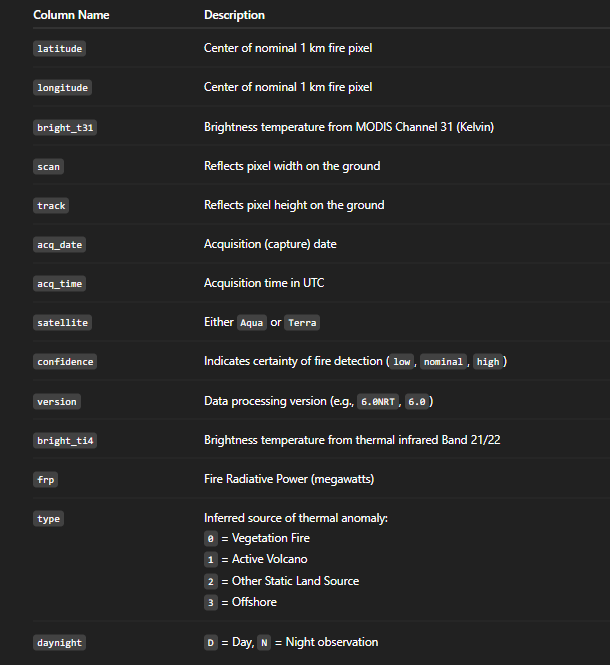




### 📚 Reference Links:

[🔗 NASA FIRMS Documentation](https://www.earthdata.nasa.gov/data/tools/firms)

[🔗 Global Fire Data Access Porta](https://firms.modaps.eosdis.nasa.gov/download/)

### Import Libraries

#### pip install numpy pandas matplotlib seaborn scikit-learn folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Load the dataset

In [2]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [14]:
df1.head(9) # print first 9 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0
5,31.4738,77.8117,303.6,1.1,1.0,2021-01-01,547,Terra,MODIS,56,6.03,280.4,9.5,D,0
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,Terra,MODIS,36,6.03,287.2,5.3,D,0
7,29.5369,79.4559,300.3,1.4,1.2,2021-01-01,547,Terra,MODIS,33,6.03,289.7,6.3,D,0
8,30.5665,79.5317,305.9,1.4,1.2,2021-01-01,547,Terra,MODIS,23,6.03,292.8,11.4,D,0


In [15]:
df2.head(6)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2
5,23.1648,82.3436,305.9,1.0,1.0,2022-01-01,512,Terra,MODIS,62,6.03,290.9,6.5,D,0


In [16]:
df3.head(8)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0
5,14.1707,75.4922,322.2,1.2,1.1,2023-01-01,823,Aqua,MODIS,66,61.03,301.7,16.0,D,0
6,15.1699,76.6700,319.2,1.0,1.0,2023-01-01,823,Aqua,MODIS,22,61.03,305.3,6.7,D,2
7,14.9327,75.1098,317.1,1.2,1.1,2023-01-01,823,Aqua,MODIS,38,61.03,302.4,9.6,D,0


In [17]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [18]:
df.shape # rows and cols

(271217, 15)

In [19]:
df.info() # dt, memc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [20]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [11]:
# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [12]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [13]:
# Check Unique values of target variable
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [22]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


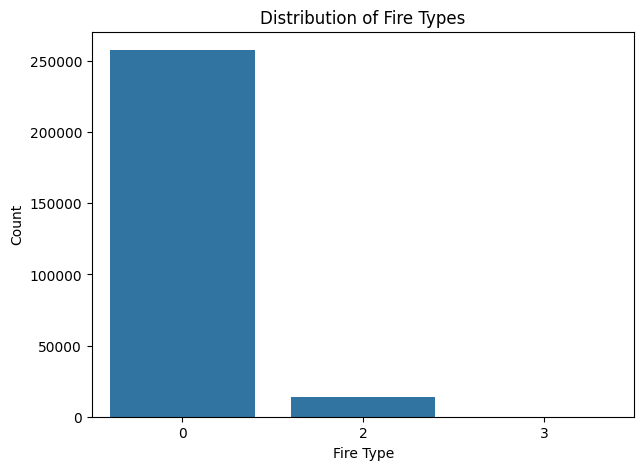

In [24]:
# Count plot for 'type'
plt.figure(figsize=(7, 5))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()


- The count plot shows the distribution of different fire types in the dataset.
- It is evident that 'MODIS' is the most frequent fire type, followed by 'VIIRS'.
- The 'type' variable appears to be unbalanced, with 'MODIS' having significantly more observations than 'VIIRS'. This imbalance might need to be considered during model training.

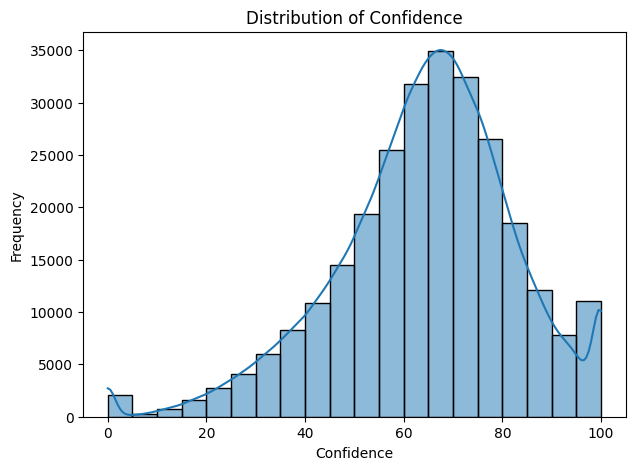

In [32]:
# Histogram of 'confidence'
plt.figure(figsize=(7, 5))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

- The histogram illustrates the distribution of the 'confidence' feature.
- The distribution appears to be bimodal, with peaks around low confidence values and high confidence values.
- There are fewer observations in the middle range of confidence.
- This suggests that observations are often recorded with either low confidence or high confidence.

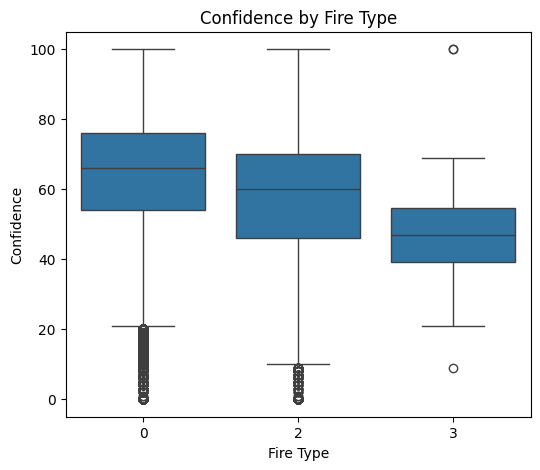

In [31]:
# Box plot for 'confidence' by 'type'
plt.figure(figsize=(6, 5))
sns.boxplot(x='type', y='confidence', data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

- The box plot shows the distribution of 'confidence' for each fire type
- Both 0 and 2 have a wide range of confidence values.
- The median confidence for both types appears to be in the higher range.
- There are some outliers, particularly for the 'MODIS' type, indicating observations with unusually low or high confidence.

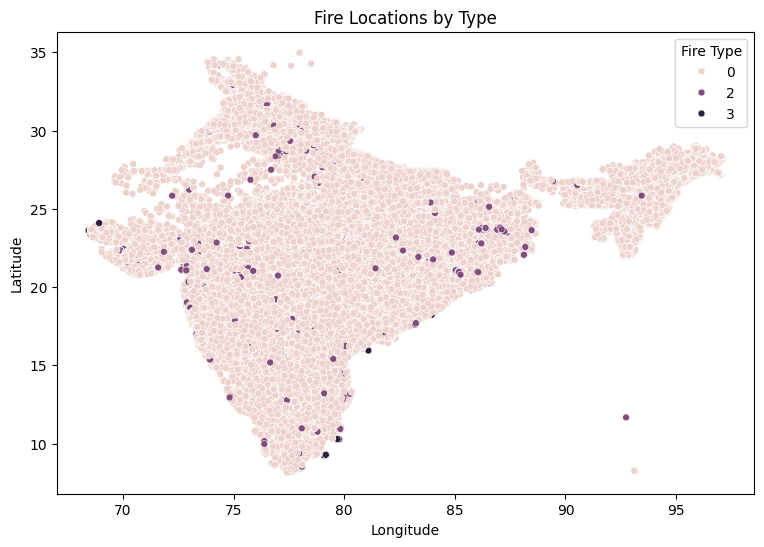

In [42]:
# Scatter plot of 'latitude' vs 'longitude'
plt.figure(figsize=(9, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='type', s=25)
plt.title('Fire Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Type')
plt.show()

 - The scatter plot visualizes the geographical distribution of fire locations, colored by fire type.
- It provides a visual representation of where fires are occurring based on latitude and longitude.
- Different fire types might be concentrated in specific geographical areas, which could be a useful feature for modeling.
- The density of points indicates areas with higher fire activity.

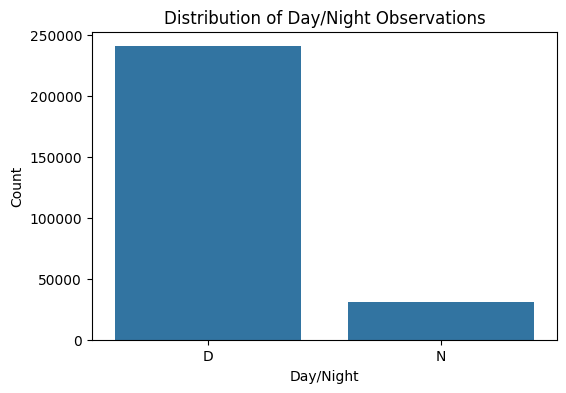

In [43]:
# Count plot for 'daynight'
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight', data=df)
plt.title('Distribution of Day/Night Observations')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

- The count plot for 'daynight' shows whether the fire observations were made during the day or night.
- It indicates the proportion of day versus night observations in the dataset.
- Knowing the distribution of day/night observations can be relevant as detection capabilities or fire behavior might differ between day and night.


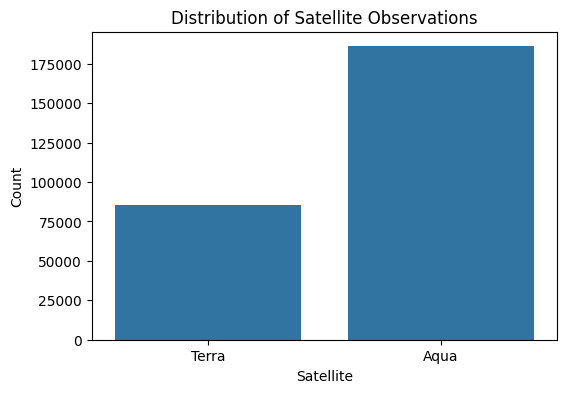

In [44]:
# Count plot for 'Satellite'
plt.figure(figsize=(6, 4))
sns.countplot(x='satellite', data=df)
plt.title('Distribution of Satellite Observations')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

- This count plot shows the distribution of observations made by different satellites.
- It reveals which satellites contributed the most data to the dataset.
- Understanding the satellite distribution can be important as different satellites may have different characteristics or coverage.

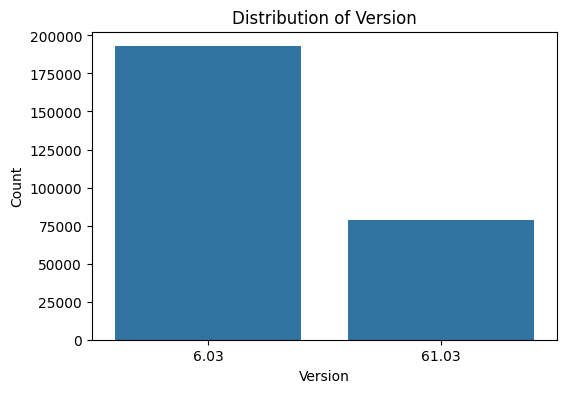

In [45]:
# Count plot for 'version'
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

In [ ]:
#this code take more time
#Pairplot for numerical features (subset)
#sns.pairplot(df[['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'type']], hue='type', diag_kind='kde')
#plt.suptitle('Pairplot of Numerical Features')
#plt.show()

The pairplot provides a matrix of scatter plots for all pairs of numerical features and histograms/KDE plots on the diagonal for each feature, separated by the 'type' variable.
Here are some insights from the pairplot:

*   **Individual Feature Distributions (Diagonal):** The diagonal plots (histograms/KDEs) show the distribution of each numerical feature for each fire type.
    *   `latitude` and `longitude`: These show the geographical distribution, reinforcing the scatter plot observation. Different fire types appear to be concentrated in certain geographical areas.
    *   `brightness`: The distribution of brightness values can be compared between fire types. There might be differences in the typical brightness of fires detected by MODIS versus VIIRS.
    *   `confidence`: This shows the distribution of confidence for each type, similar to the earlier box plot but as a histogram/KDE. It can highlight differences in the confidence levels associated with each fire type.
    *   `frp`: The distribution of fire radiative power (FRP) can be compared. This might reveal if one fire type tends to have significantly higher or lower FRP values than the other.

*   **Relationships Between Features (Off-Diagonal Scatter Plots):** The off-diagonal scatter plots show the relationship between pairs of numerical features, colored by fire type.
    *   `latitude` vs. `longitude`: As seen before, this visualizes the geographical distribution by type.
    *   `brightness` vs. `confidence`: This plot shows the relationship between brightness and confidence. Is there a correlation? Does higher brightness tend to correlate with higher confidence? How does this relationship differ between fire types?
    *   `brightness` vs. `frp`: This shows the relationship between brightness and fire radiative power. These two features are likely related. The plot can reveal the strength and nature of this relationship and whether it varies by fire type.
    *   `confidence` vs. `frp`: This visualizes the relationship between confidence and FRP. Does higher FRP tend to result in higher confidence? How does this relationship differ for different fire types?
    *   Other pairs: Examine the relationships between `latitude`/`longitude` and the other numerical features (`brightness`, `confidence`, `frp`). Are there geographical patterns in these features?


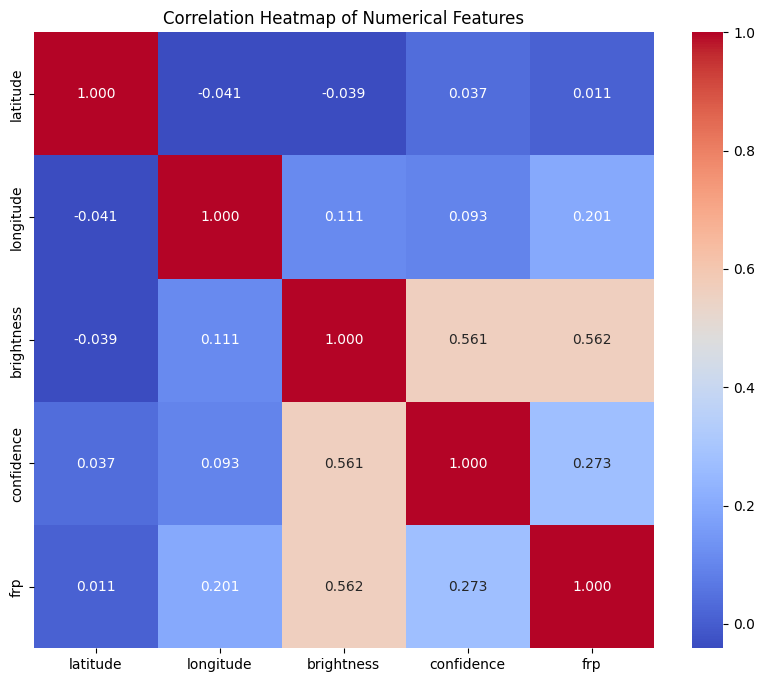

In [48]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['latitude', 'longitude', 'brightness', 'confidence', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The heatmap visualizes the Pearson correlation coefficients between the numerical features: 'latitude', 'longitude', 'brightness', 'confidence', and 'frp'. The values range from -1 to 1, where:
- 1 indicates a perfect positive linear correlation.
- -1 indicates a perfect negative linear correlation.
- 0 indicates no linear correlation.
- The color intensity and the annotation (`annot=True`) help in quickly identifying the strength and direction of the relationships.

Key insights from the heatmap:

1.  **High Correlation between `brightness` and `frp`:** There appears to be a strong positive correlation between 'brightness' and 'frp'. This is expected as both features are related to the intensity of the fire. Higher brightness is likely to be associated with higher fire radiative power. This strong correlation might indicate multicollinearity if both features are used directly in a linear model, but can also be insightful for understanding the data.

2.  **Moderate Correlation between `brightness` and `confidence`:** There seems to be a moderate positive correlation between 'brightness' and 'confidence'. This suggests that brighter fire detections tend to be associated with higher confidence levels.

3.  **Moderate Correlation between `frp` and `confidence`:** Similarly, there is likely a moderate positive correlation between 'frp' and 'confidence'. Fires with higher radiative power might be easier to detect and thus have higher confidence scores.

4.  **Low Correlation with Geographical Features:** The correlations between 'latitude' and 'longitude' with 'brightness', 'confidence', and 'frp' appear to be relatively low. This suggests that the intensity or confidence of a fire detection is not strongly linearly related to its geographical location. While there might be spatial patterns as seen in the scatter plot, a simple linear correlation doesn't capture them strongly.

5.  **Correlation between `latitude` and `longitude`:** The correlation between 'latitude' and 'longitude' is often low unless there's a specific geographical pattern in the data that aligns linearly. In this case, it's likely low, indicating that fires are distributed across various locations without a strong linear relationship between their latitude and longitude coordinates within the dataset.

Overall, the heatmap provides a concise overview of the linear relationships between the numerical features. It highlights the expected strong correlations between features related to fire intensity (`brightness`, `frp`, `confidence`) and shows that geographical coordinates have weaker linear relationships with these intensity measures. This information can be valuable for feature selection, understanding feature interactions, and guiding the choice of modeling techniques.

In [49]:
numerical_cols = df.select_dtypes(include=np.number).columns

In [50]:
numerical_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

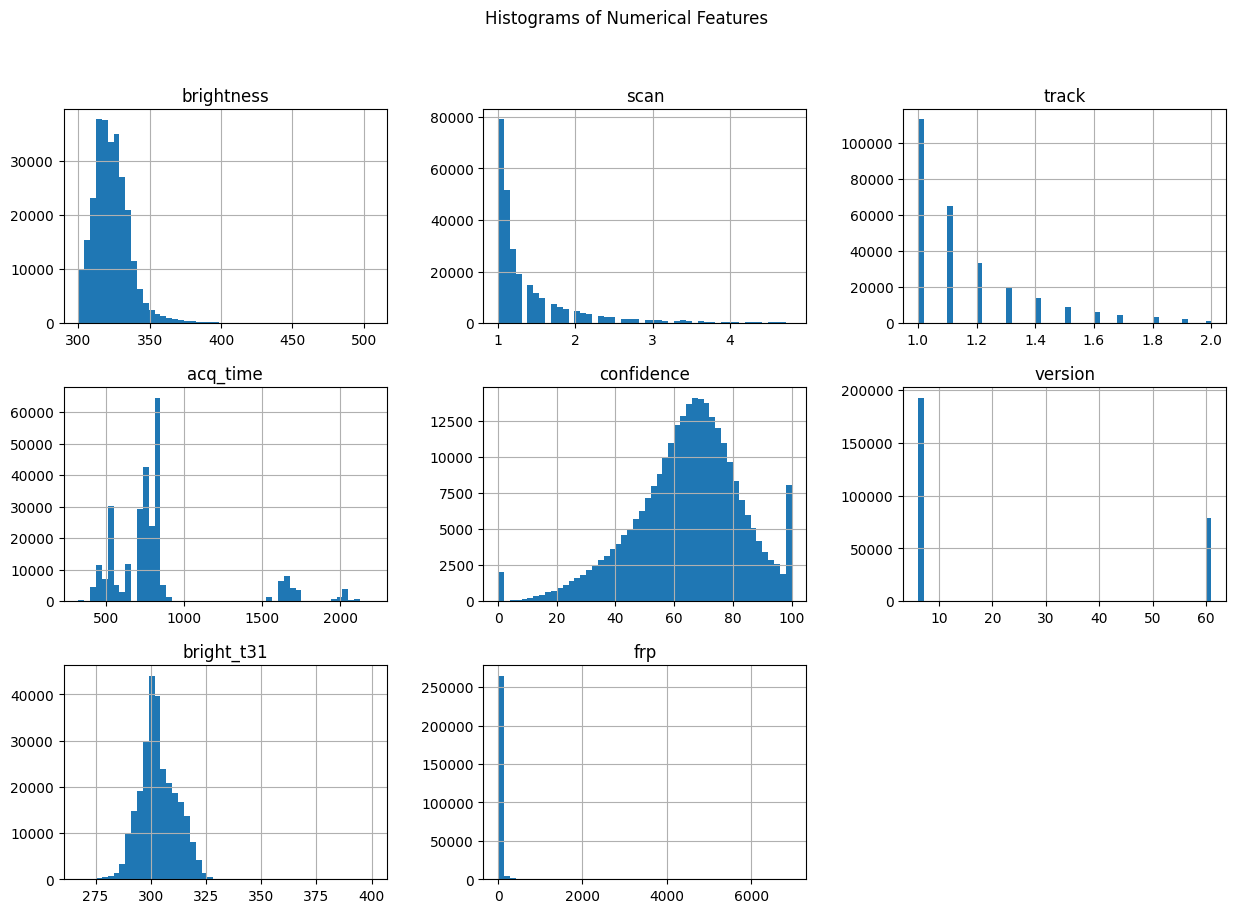

In [56]:
numerical_cols = ['brightness', 'scan', 'track', 'acq_time','confidence', 'version', 'bright_t31', 'frp']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

- 'brightness': The distribution of brightness values. This shows the range of detected fire brightness and where the values tend to cluster. It might reveal if fires tend to be of low, medium, or high brightness.
- 'scan': The distribution of scan sizes. This feature relates to the size of the pixel footprint. The histogram shows the typical scan sizes in the dataset.
- 'track': Similar to scan, this relates to the track size. The histogram shows the distribution of track sizes.
- 'acq_time': The distribution of acquisition times (likely represented as a numerical value like time of day). This histogram can reveal patterns in when fires are detected (e.g., more detections during certain hours).
- 'confidence': The distribution of confidence scores. This is a numerical representation of the earlier confidence histogram and box plot. It reinforces the bimodal nature observed earlier.
- 'version': The distribution of different version values. This shows the frequency of observations from different processing versions.
- 'bright_t31': The distribution of brightness temperature at band 31. This is another measure related to fire intensity. Its distribution can be compared to 'brightness'.
- 'frp': The distribution of fire radiative power. This shows the typical FRP values in the dataset and their range. It complements the 'brightness' histogram in understanding fire intensity.
- 'type': While 'type' is included in the numerical columns list due to its representation, its histogram will show the distribution of the encoded numerical values for fire types. This visually confirms the class imbalance seen in the count plot.

-Overall, these histograms provide a detailed look at the individual distributions of the numerical features. They help in understanding the range, central tendency, and variability of each feature, identifying potential outliers, and assessing the shape of the distribution (e.g., normal, skewed, bimodal). This information is crucial for data preprocessing, feature understanding, and selecting appropriate modeling techniques.

In [57]:
import statsmodels.api as sm
import scipy.stats as stats

# List of numerical features to check for distribution
numerical_features = ['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']

for feature in numerical_features:
    print(f"Analyzing distribution for: {feature}")

    # KDE Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')

    plt.tight_layout()
    plt.show()
    print("-" * 50)

ModuleNotFoundError: No module named 'statsmodels'

'brightness': Distribution is skewed and bimodal, QQ plot shows significant deviation from normality.

'confidence': Distribution is bimodal with peaks at low and high values, QQ plot confirms non-normality, especially in the tails.

'frp': Distribution is highly skewed to the right, QQ plot shows a strong departure from the normal distribution, particularly for larger values.

'bright_t31': Distribution appears somewhat skewed, QQ plot indicates deviation from normality, especially at the extremes.

'scan': Distribution is concentrated at lower values with a tail towards higher values, QQ plot suggests non-normality.

'track': Distribution is concentrated at lower values with a tail towards higher values, QQ plot suggests non-normality.

In [ ]:
# --- Temporal Analysis ---
# Convert 'acq_date' to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])
# Extract temporal features
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour'] = df['acq_time'].astype(str).str[:2].astype(int) # Assuming acq_time is HHMM

1.  **Extracting Temporal Features:** It converts the `acq_date` column to datetime objects and extracts new features like `year`, `month`, `day_of_week`, `day_of_year`, and `hour` from the acquisition date and time.
2.  **Visualizing Temporal Distributions:** It generates count plots to show:
    *   The number of fire detections per month.
    *   The number of fire detections per day of the week.

In [ ]:
# Visualize fire detections over months
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Fire Detections by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# Visualize fire detections by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='viridis')
plt.title('Fire Detections by Day of Week (2023)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

###Outliers and Outlier Treatments
Outliers: Outliers are data points that are significantly different from other observations in a dataset. They can occur due to measurement errors, data entry mistakes, or genuinely rare events. Outliers can skew statistical analyses (like mean, standard deviation) and impact the performance of machine learning models.

In [ ]:
# Visualize outliers using box plots for key numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Key Numerical Features')
plt.ylabel('Value')
plt.show()

 *   **'brightness', 'bright_t31', 'frp':** These fire intensity-related features show a wide range and numerous high-value outliers, suggesting that while most fires might have moderate intensity, there are instances of very bright or high-FRP fires. The lower whiskers might also show some outliers on the lower end.

  *   **'scan', 'track':** These features related to pixel size also show outliers, indicating observations where the scan/track size was significantly different from the typical values.
  *   **'confidence':** The box plot for confidence, similar to the histogram, likely reinforces the concentration of data at the ends (low and high confidence), with some outliers in the middle range or beyond.
  *   **'acq_time':** Depending on how 'acq_time' is represented numerically, the box plot could show if there are acquisition times that are significantly different from the usual patterns.
  *   **'version', 'type':** These are likely represented numerically but are essentially categorical or ordinal. Their box plots might not be as informative as count plots for distribution, but they can still show the spread of other numerical features within each version/type category if plotted against them.

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Apply outlier removal to numerical columns
for col in numerical_cols:
  df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)

In [ ]:
# Visualize box plots after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

Box Plots (After):
- The individual outlier points above and below the whiskers in the previous box plots have been significantly reduced or eliminated for the treated columns ('brightness', 'scan', 'track', 'bright_t31', 'frp').
- The maximum and minimum values represented by the upper and lower whiskers will be much closer to the bulk of the data, as extreme values have been removed.
- The scale of the y-axis in the box plots for the treated features is likely smaller, as it now focuses on the data within the calculated IQR range.
- The boxes (IQR) and whiskers now represent the distribution of the majority of the cleaned data. While the IQR method removes values outside 1.5*IQR from the quartiles, some data points beyond the whiskers might still be present, but they represent the less extreme values within the filtered dataset. The visual spread of the central 50% (the box) and the range covered by the whiskers (typically 1.5*IQR) will be more representative of the data after removing the most extreme values.
- For 'confidence', 'acq_time', 'version', and 'type', where outlier removal wasn't explicitly applied in the code snippet, their box plots would show similar distributions as before, potentially still displaying outliers if present in the original data.




In [ ]:
df.head()

In [ ]:
df.type.value_counts()

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

In [ ]:
categorical_cols

In [ ]:
# Select categorical columns for encoding
categorical_cols_to_encode = ['daynight', 'satellite', 'instrument']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

In [ ]:
df_encoded.head(100)

In [ ]:
df_encoded.type.value_counts()

### pip install folium - if needed use this

In [ ]:
# !pip install folium
import folium

# Create map and sample data
india_map = folium.Map(location=[22.351115, 78.667743], zoom_start=5)
sample_df = df_encoded.sample(n=min(10000, len(df_encoded)), random_state=42)

# Add markers
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"FRP: {row['frp']:.2f}, Date: {row['acq_date'].strftime('%Y-%m-%d')}"
    ).add_to(india_map)

display(india_map)

Folium map of India with red circle markers indicating fire locations based on the 'latitude' and 'longitude' columns of the dataset. Each marker represents a detected fire incident.

Here are some potential insights derived from this map:

1.  **Geographical Distribution of Fires:** The map visually shows where fires are occurring across India. Areas with a higher concentration of markers indicate regions with more frequent fire activity in the dataset's timeframe.
2.  **Spatial Clusters:** You can observe if fires are clustered in specific states, regions, or ecological zones. For example, are fires more common in forested areas, agricultural regions, or industrial zones?
3.  **Potential Hotspots:** Densely packed clusters of markers highlight potential fire hotspots. These are areas that might be particularly vulnerable to fires and could require targeted fire prevention and management efforts.
4.  **Variability Across India:** The map illustrates the spatial variability of fire incidents across the country. Some areas might have very few detections, while others show significant activity.
5.  **Interaction with Popups:** Hovering over or clicking on the markers reveals additional information provided in the popup, specifically the Fire Radiative Power (FRP) and the acquisition date of the fire detection. This allows for a closer inspection of individual fire events, providing context about their intensity and timing.
6.  **Effectiveness of Sampling:** Since the code uses a sample of the data (`sample_df`), the map shows the distribution based on that sample. If the original dataset is very large, sampling is necessary for visualization, but it's important to remember that the map represents the sample's distribution, not necessarily the entire dataset's distribution perfectly. The effectiveness of the sampling can be assessed visually if the sample density appears to reflect the expected distribution of fires.
7.  **Temporal Patterns (Limited):** While not directly a temporal visualization, the date in the popup allows for some manual exploration of fire events at specific locations over time. However, a dedicated temporal visualization (like an animation or time series analysis) would be more effective for observing how fire locations change over the acquisition period.

In summary, the Folium map provides a powerful visual overview of the spatial distribution of fire incidents across India, helping to identify fire-prone regions and providing a geographical context for the fire data.

### Normalize continuous variables

In [ ]:
scaler = StandardScaler()
numerical_cols_to_scale = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
df_encoded.head()

In [ ]:
df_encoded.info()

In [ ]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df_encoded.head()

In [ ]:
df_encoded.type.value_counts()

In [ ]:
# Separate features (X) and target variable (y)
# Assuming 'type' is the target variable you want to predict
# Drop temporal features if not intended for prediction task that uses 'type' as target
features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
target = 'type'

X = df_encoded[features]
y = df_encoded[target]


In [ ]:
X

In [ ]:
y

In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# Initialize SMOTE #week 2
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after resampling
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())